In [1]:
import numpy as np
import pandas as pd
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as mtick
from scipy.stats import chi2_contingency

In [2]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 

In [3]:
df = pd.read_csv('./Data/avpat_avtum_sactpat_sacttum_sactreg.csv', sep = '^', index_col = 0)
df.head()

,PATIENTID,SEX,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,PR_POS,HER_POS,CURATIVE,NONCURATIVE,NOACTTREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_DAYS_MEAN,CANCER_MONTHS_MEAN,CANCER_YEARS_MEAN,BMI3,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE.1,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,CHEM_RADIO_TARG2,HORM_TARG2,HORMONE2,OTHER2
0,10000724,M,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,71.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,1226.0,40.280088,3.356674,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,10000752,F,White British,A,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,432.0,14.193310,1.182776,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,10001050,F,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,450.0,14.784698,1.232058,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,10001750,M,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,71.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,846.0,27.795232,2.316269,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,10001824,F,Other ethnic group,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,674.0,22.144192,1.845349,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
df.shape

(105686, 92)

In [5]:
df.isna().sum()

PATIENTID                0
SEX                      0
ETHNICITY             6918
NEWVITALSTATUS           0
NUMBER_TUMOURS           0
SC500                    0
SC501                    0
SC502                    0
SC503                    0
SC504                    0
SC505                    0
SC506                    0
SC508                    0
BEH_BENIGN               0
BEH_MALIG                0
BEH_MICINV               0
BEH_INSITU               0
BEH_UNCERT               0
T0                       0
T1                       0
T2                       0
T3                       0
T4                       0
N0                       0
N1                       0
N2                       0
N3                       0
M1                       0
STAGE0                   0
STAGE1                   0
STAGE2                   0
STAGE3                   0
STAGE4                   0
GRADE1                   0
GRADE2                   0
GRADE3                   0
GRADE4                   0
A

In [6]:
df.dtypes

PATIENTID               int64
SEX                    object
ETHNICITY              object
NEWVITALSTATUS         object
NUMBER_TUMOURS          int64
SC500                    bool
SC501                    bool
SC502                    bool
SC503                    bool
SC504                    bool
SC505                    bool
SC506                    bool
SC508                    bool
BEH_BENIGN               bool
BEH_MALIG                bool
BEH_MICINV               bool
BEH_INSITU               bool
BEH_UNCERT               bool
T0                       bool
T1                       bool
T2                       bool
T3                       bool
T4                       bool
N0                       bool
N1                       bool
N2                       bool
N3                       bool
M1                       bool
STAGE0                   bool
STAGE1                   bool
STAGE2                   bool
STAGE3                   bool
STAGE4                   bool
GRADE1    

In [7]:
original_memory = df.memory_usage(deep=True).sum() / 1024**2 
print('Memory used: %.1f MB' % original_memory)

Memory used: 34.9 MB


In [8]:
for col in ['SEX', 'ETHNICITY']:
    df[col] = df[col].astype('category')
    
df.head()

,PATIENTID,SEX,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,PR_POS,HER_POS,CURATIVE,NONCURATIVE,NOACTTREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_DAYS_MEAN,CANCER_MONTHS_MEAN,CANCER_YEARS_MEAN,BMI3,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE.1,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,CHEM_RADIO_TARG2,HORM_TARG2,HORMONE2,OTHER2
0,10000724,M,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,71.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,1226.0,40.280088,3.356674,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,10000752,F,White British,A,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,432.0,14.193310,1.182776,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,10001050,F,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,450.0,14.784698,1.232058,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,10001750,M,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,71.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,846.0,27.795232,2.316269,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,10001824,F,Other ethnic group,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,674.0,22.144192,1.845349,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
def dead(value):
    if value == 'D':
        return 1
    else:
        return 0

df['DEAD'] = df['NEWVITALSTATUS'].apply(dead)    
df['DEAD'].value_counts()

0    104333
1      1353
Name: DEAD, dtype: int64

In [10]:
df = df.drop(['NEWVITALSTATUS'], axis = 1)
df.head()

,PATIENTID,SEX,ETHNICITY,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,PR_POS,HER_POS,CURATIVE,NONCURATIVE,NOACTTREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_DAYS_MEAN,CANCER_MONTHS_MEAN,CANCER_YEARS_MEAN,BMI3,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE.1,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,CHEM_RADIO_TARG2,HORM_TARG2,HORMONE2,OTHER2,DEAD
0,10000724,M,White British,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,71.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,1226.0,40.280088,3.356674,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
1,10000752,F,White British,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,432.0,14.193310,1.182776,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
2,10001050,F,White British,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,450.0,14.784698,1.232058,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
3,10001750,M,White British,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,71.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,846.0,27.795232,2.316269,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
4,10001824,F,Other ethnic group,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,674.0,22.144192,1.845349,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0


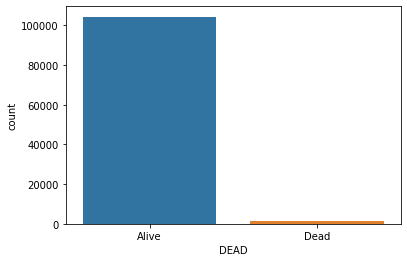

In [11]:
ax = sns.countplot(data = df, x = 'DEAD')
ax.set_xticklabels(['Alive', 'Dead'])
plt.show()

In [12]:
percentage_alive = np.mean(df['DEAD'] == 0) * 100
percentage_dead = np.mean(df['DEAD'] == 1) * 100
print("Percentage of patients classified as alive: %.2f" % percentage_alive)
print("Percentage of patients classified as dead: %.2f" % percentage_dead)

Percentage of patients classified as alive: 98.72
Percentage of patients classified as dead: 1.28


In [13]:
new_memory = df.memory_usage(deep = True).sum() / 1024 ** 2 
print('Memory used: %.1f GB' % new_memory)

Memory used: 20.7 GB


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


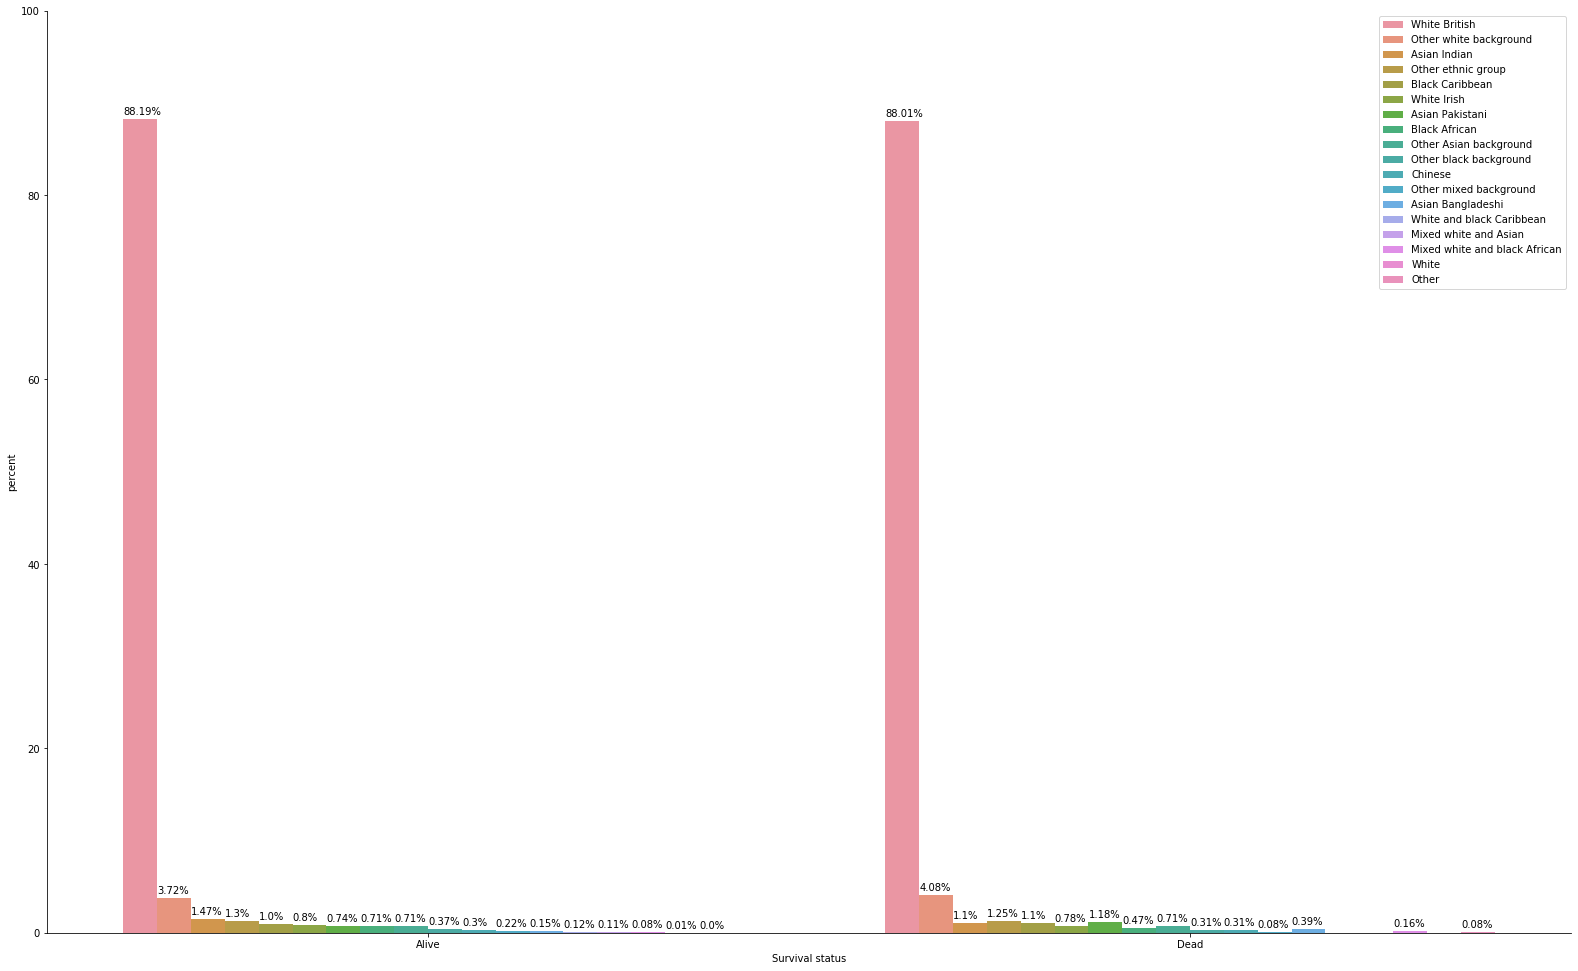

In [14]:
x, y = 'DEAD', 'ETHNICITY'

ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', legend_out = False))

ax.set(xticklabels=['Alive','Dead'])
ax.set(xlabel='Survival status')
ax.ax.legend(loc='upper right')
ax.ax.set_ylim(0, 100)
plt.gcf().set_size_inches(25,15)

for p in ax.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height() + 0.5
    ax.ax.text(txt_x,txt_y,txt)

In [15]:
contingency = pd.crosstab(df['DEAD'], df['ETHNICITY'])
contingency

ETHNICITY,Asian Bangladeshi,Asian Indian,Asian Pakistani,Black African,Black Caribbean,Chinese,Mixed white and Asian,Mixed white and black African,Other,Other Asian background,Other black background,Other ethnic group,Other mixed background,Other white background,White,White British,White Irish,White and black Caribbean
DEAD,,,,,,,,,,,,,,,,,,
0,150,1434,720,691,972,295,108,76,1,691,356,1266,212,3628,13,85980,784,115
1,5,14,15,6,14,4,0,2,1,9,4,16,1,52,0,1123,10,0


In [16]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

1.3829210474943568e-05


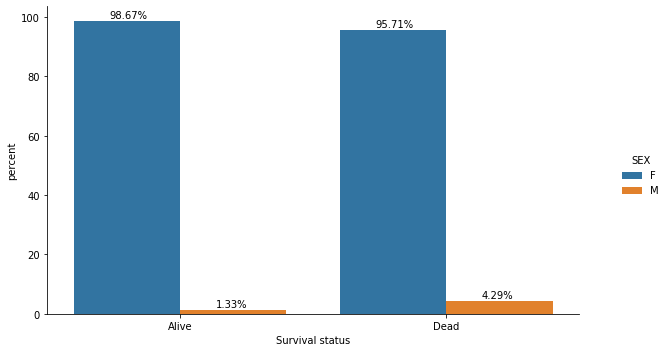

In [17]:
x, y = 'DEAD', 'SEX'

ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar'))

ax.set(xticklabels=['Alive','Dead'])
ax.set(xlabel='Survival status')
plt.gcf().set_size_inches(10,5)
    
for p in ax.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    ax.ax.text(txt_x,txt_y,txt)

In [18]:
df['SEX'].value_counts()

F    104243
M      1443
Name: SEX, dtype: int64

In [18]:
# ax = df.groupby(['DEAD','SEX']).size().groupby(level=0).apply(
#     lambda x: 100 * x / x.sum()
# ).unstack().plot(kind='bar',stacked=True)

# ax.set(xticklabels=['Alive','Dead'])
# plt.xticks(rotation='horizontal')
# ax.set(xlabel='Survival status')
# ax.set(ylabel='Percentage')
# # plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
# plt.gcf().set_size_inches(10,5)

# for p in ax.patches:
#     width, height = p.get_width(), p.get_height()
#     x, y = p.get_xy() 
#     ax.text(x+width/2, 
#             y+height/2, 
#             '{:.2f} %'.format(height), 
#             horizontalalignment='center', 
#             verticalalignment='center')    

In [19]:
contingency = pd.crosstab(df['DEAD'], df['SEX'])
contingency

SEX,F,M
DEAD,,
0,102948,1385
1,1295,58


In [20]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

3.5215327803943764e-20


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


AxesSubplot(0.140764,0.116111;0.620527x0.853889)


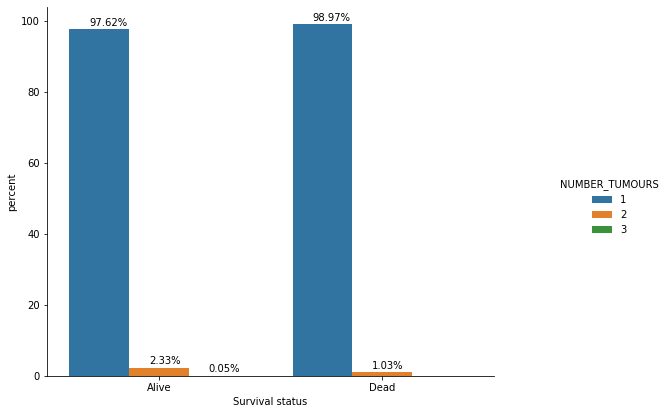

In [20]:
x, y = 'DEAD', 'NUMBER_TUMOURS'

ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar'))

ax.set(xticklabels=['Alive','Dead'])
ax.set(xlabel='Survival status')
plt.gcf().set_size_inches(10,6)

for p in ax.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    ax.ax.text(txt_x,txt_y,txt)

In [22]:
contingency = pd.crosstab(df['DEAD'], df['NUMBER_TUMOURS'])
contingency

NUMBER_TUMOURS,1,2,3
DEAD,,,
0,101853,2430,50
1,1339,14,0


In [23]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.005063628443711178


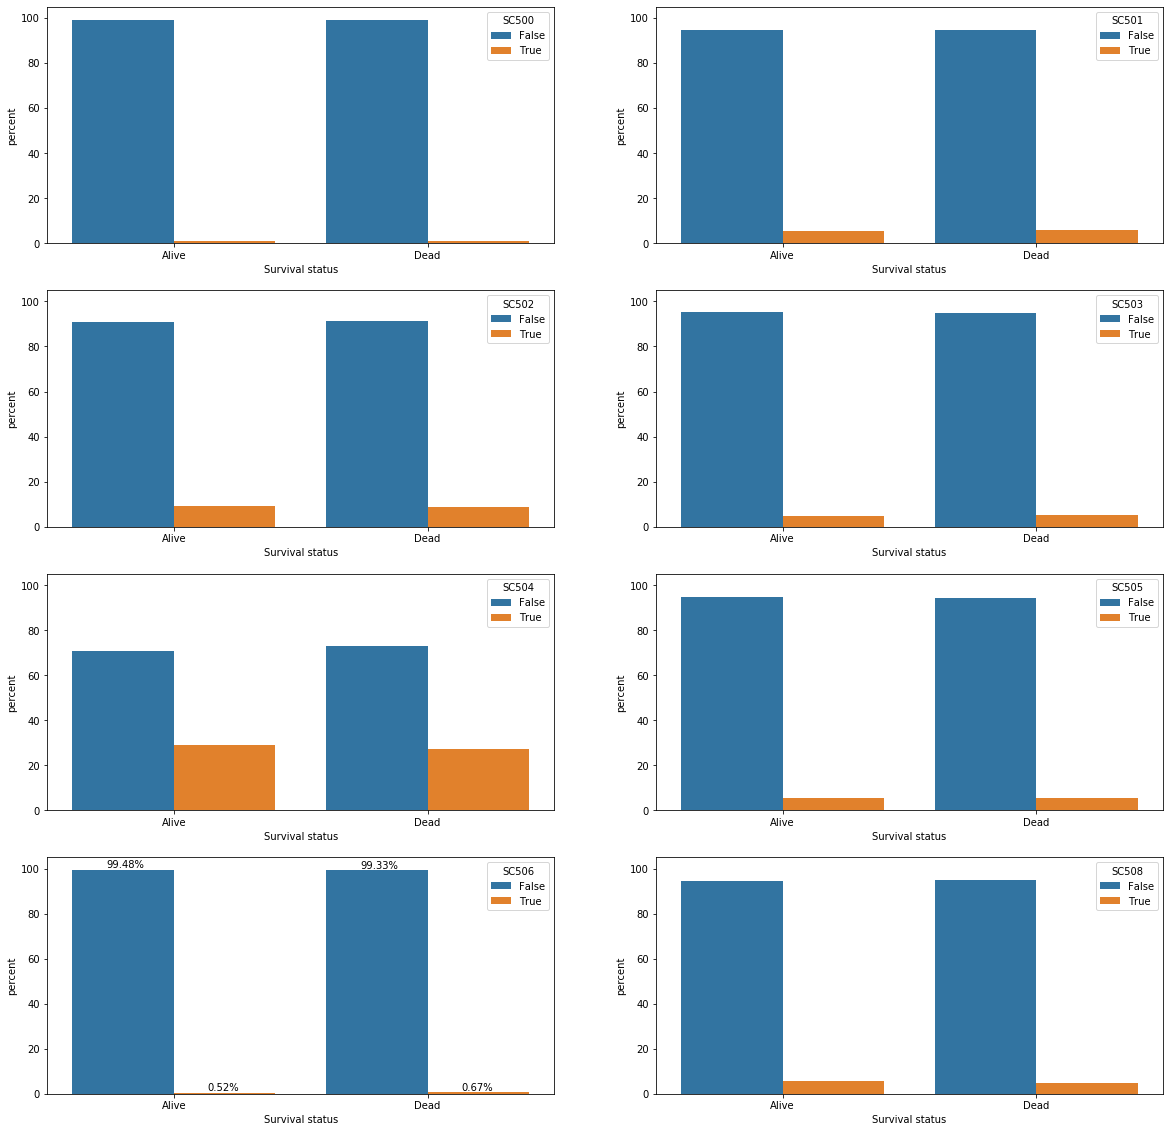

In [21]:
f, axes = plt.subplots(4, 2, figsize=(20, 20))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'SC500'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


#Figure 2
x, y = 'DEAD', 'SC501'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


#Figure 3
x, y = 'DEAD', 'SC502'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)
    

#Figure 4
x, y = 'DEAD', 'SC503'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


#Figure 5
x, y = 'DEAD', 'SC504'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 0]))

axes[2,0].set(xticklabels=['Alive','Dead'])
axes[2,0].set(xlabel='Survival status')
axes[2,0].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


#Figure 6
x, y = 'DEAD', 'SC505'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 1]))

axes[2,1].set(xticklabels=['Alive','Dead'])
axes[2,1].set(xlabel='Survival status')
axes[2,1].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)
    
#Figure 7
x, y = 'DEAD', 'SC506'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[3, 0]))

axes[3,0].set(xticklabels=['Alive','Dead'])
axes[3,0].set(xlabel='Survival status')
axes[3,0].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)
    

#Figure 8
x, y = 'DEAD', 'SC508'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[3, 1]))

axes[3,1].set(xticklabels=['Alive','Dead'])
axes[3,1].set(xlabel='Survival status')
axes[3,1].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)
    
    
for p in axes[3,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[3,0].text(txt_x,txt_y,txt)
    
 
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
plt.close(7)
plt.close(8)
plt.close(9)
plt.show()

In [25]:
contingency = pd.crosstab(df['DEAD'], df['SC500'])
contingency

SC500,False,True
DEAD,,
0,103221,1112
1,1340,13


In [26]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.8098751573790034


In [27]:
contingency = pd.crosstab(df['DEAD'], df['SC501'])
contingency

SC501,False,True
DEAD,,
0,98819,5514
1,1278,75


In [28]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.7184180153026741


In [29]:
contingency = pd.crosstab(df['DEAD'], df['SC502'])
contingency

SC502,False,True
DEAD,,
0,94723,9610
1,1237,116


In [30]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.448159808211653


In [31]:
contingency = pd.crosstab(df['DEAD'], df['SC503'])
contingency

SC503,False,True
DEAD,,
0,99381,4952
1,1285,68


In [32]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.6774348441218762


In [33]:
contingency = pd.crosstab(df['DEAD'], df['SC504'])
contingency

SC504,False,True
DEAD,,
0,73981,30352
1,984,369


In [34]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.15165637464339302


In [35]:
contingency = pd.crosstab(df['DEAD'], df['SC505'])
contingency

SC505,False,True
DEAD,,
0,98665,5668
1,1277,76


In [36]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.8125406092475302


In [37]:
contingency = pd.crosstab(df['DEAD'], df['SC506'])
contingency

SC506,False,True
DEAD,,
0,103788,545
1,1344,9


In [38]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.5937685568752589


In [39]:
contingency = pd.crosstab(df['DEAD'], df['SC508'])
contingency

SC508,False,True
DEAD,,
0,98511,5822
1,1287,66


In [40]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.28952121248897733


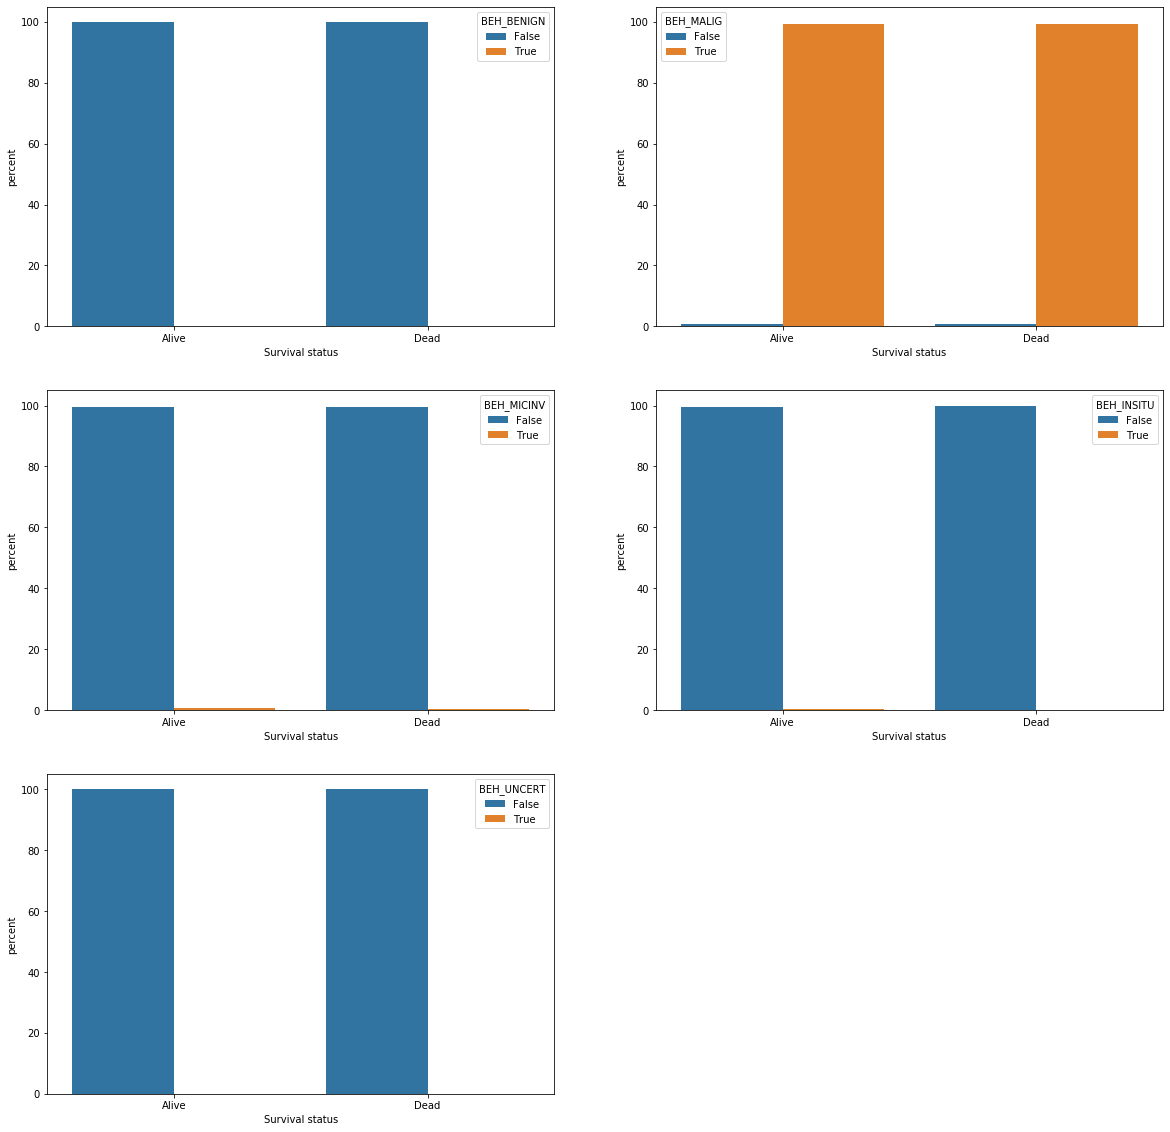

In [41]:
f, axes = plt.subplots(3, 2, figsize=(20, 20))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'BEH_BENIGN'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


#Figure 2
x, y = 'DEAD', 'BEH_MALIG'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


#Figure 3
x, y = 'DEAD', 'BEH_MICINV'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)
    

#Figure 4
x, y = 'DEAD', 'BEH_INSITU'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


#Figure 5
x, y = 'DEAD', 'BEH_UNCERT'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 0]))

axes[2,0].set(xticklabels=['Alive','Dead'])
axes[2,0].set(xlabel='Survival status')
axes[2,0].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)

    
    
# for p in ax.ax.patches:
#     txt = str(p.get_height().round(2)) + '%'
#     txt_x = p.get_x() + p.get_width() / 3
#     txt_y = p.get_height() + 1
#     ax.ax.text(txt_x,txt_y,txt)
    
 
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
f.delaxes(ax = axes[2,1]) 
plt.show()

In [42]:
contingency = pd.crosstab(df['DEAD'], df['BEH_BENIGN'])
contingency

BEH_BENIGN,False,True
DEAD,,
0,104316,17
1,1352,1


In [43]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.5719235393111486


In [44]:
contingency = pd.crosstab(df['DEAD'], df['BEH_MALIG'])
contingency

BEH_MALIG,False,True
DEAD,,
0,875,103458
1,9,1344


In [45]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.5851300449400924


In [46]:
contingency = pd.crosstab(df['DEAD'], df['BEH_MICINV'])
contingency

BEH_MICINV,False,True
DEAD,,
0,103690,643
1,1348,5


In [47]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.3271116863283731


In [48]:
contingency = pd.crosstab(df['DEAD'], df['BEH_INSITU'])
contingency

BEH_INSITU,False,True
DEAD,,
0,103849,484
1,1351,2


In [49]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.13227249042330594


In [50]:
contingency = pd.crosstab(df['DEAD'], df['BEH_UNCERT'])
contingency

BEH_UNCERT,False,True
DEAD,,
0,104287,46
1,1353,0


In [51]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.9071655250031269


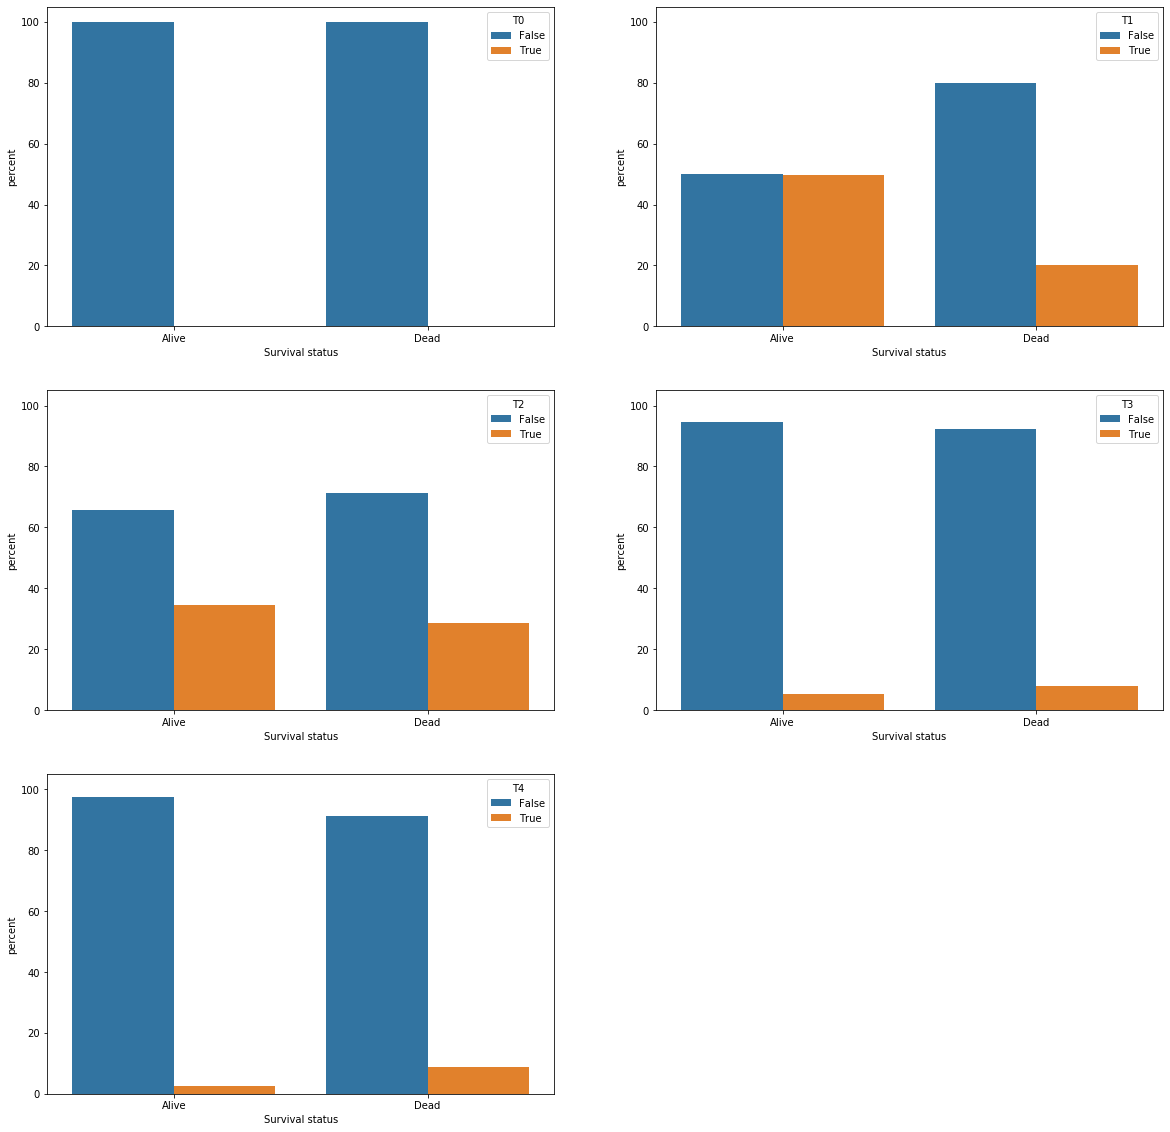

In [52]:
f, axes = plt.subplots(3, 2, figsize=(20, 20))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'T0'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


#Figure 2
x, y = 'DEAD', 'T1'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


#Figure 3
x, y = 'DEAD', 'T2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)
    

#Figure 4
x, y = 'DEAD', 'T3'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


#Figure 5
x, y = 'DEAD', 'T4'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 0]))

axes[2,0].set(xticklabels=['Alive','Dead'])
axes[2,0].set(xlabel='Survival status')
axes[2,0].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)

    
    
# for p in ax.ax.patches:
#     txt = str(p.get_height().round(2)) + '%'
#     txt_x = p.get_x() + p.get_width() / 3
#     txt_y = p.get_height() + 1
#     ax.ax.text(txt_x,txt_y,txt)
    
 
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
f.delaxes(ax = axes[2,1]) 
plt.show()

In [53]:
contingency = pd.crosstab(df['DEAD'], df['T0'])
contingency

T0,False,True
DEAD,,
0,104249,84
1,1353,0


In [54]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.5763994428975929


In [55]:
contingency = pd.crosstab(df['DEAD'], df['T1'])
contingency

T1,False,True
DEAD,,
0,52326,52007
1,1080,273


In [56]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

4.825723046891729e-104


In [57]:
contingency = pd.crosstab(df['DEAD'], df['T2'])
contingency

T2,False,True
DEAD,,
0,68479,35854
1,965,388


In [58]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

1.3586400495068187e-05


In [59]:
contingency = pd.crosstab(df['DEAD'], df['T3'])
contingency

T3,False,True
DEAD,,
0,98783,5550
1,1248,105


In [60]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

9.484161417856976e-05


In [61]:
contingency = pd.crosstab(df['DEAD'], df['T4'])
contingency

T4,False,True
DEAD,,
0,101532,2801
1,1233,120


In [62]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

9.603772503532299e-43


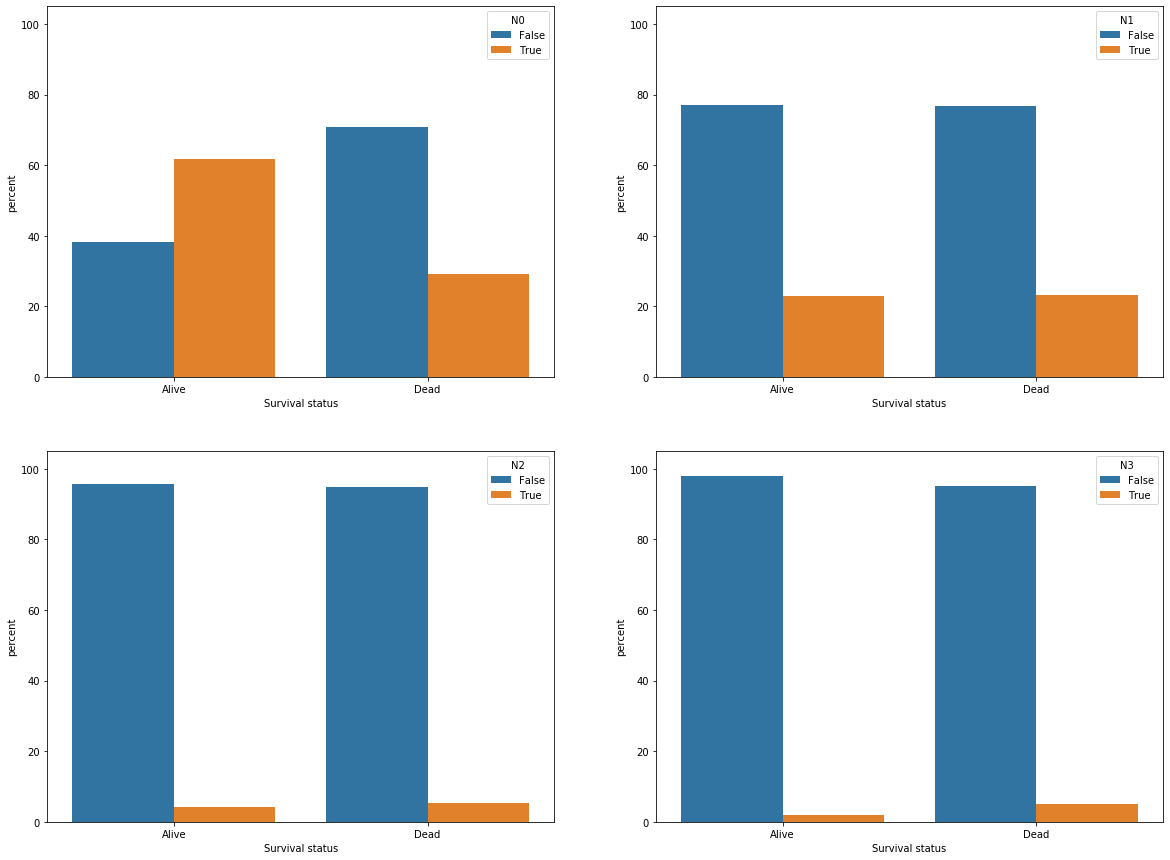

In [63]:
f, axes = plt.subplots(2, 2, figsize=(20, 15))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'N0'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


#Figure 2
x, y = 'DEAD', 'N1'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


#Figure 3
x, y = 'DEAD', 'N2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)
    

#Figure 4
x, y = 'DEAD', 'N3'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


    
# for p in ax.ax.patches:
#     txt = str(p.get_height().round(2)) + '%'
#     txt_x = p.get_x() + p.get_width() / 3
#     txt_y = p.get_height() + 1
#     ax.ax.text(txt_x,txt_y,txt)
    
 
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.show()

In [64]:
contingency = pd.crosstab(df['DEAD'], df['N0'])
contingency

N0,False,True
DEAD,,
0,40032,64301
1,958,395


In [65]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

1.9271417085369554e-130


In [66]:
contingency = pd.crosstab(df['DEAD'], df['N1'])
contingency

N1,False,True
DEAD,,
0,80393,23940
1,1039,314


In [67]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.8453064518256286


In [68]:
contingency = pd.crosstab(df['DEAD'], df['N2'])
contingency

N2,False,True
DEAD,,
0,99919,4414
1,1282,71


In [69]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.0757685318877368


In [70]:
contingency = pd.crosstab(df['DEAD'], df['N3'])
contingency

N3,False,True
DEAD,,
0,102244,2089
1,1286,67


In [71]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

5.108243923932366e-14


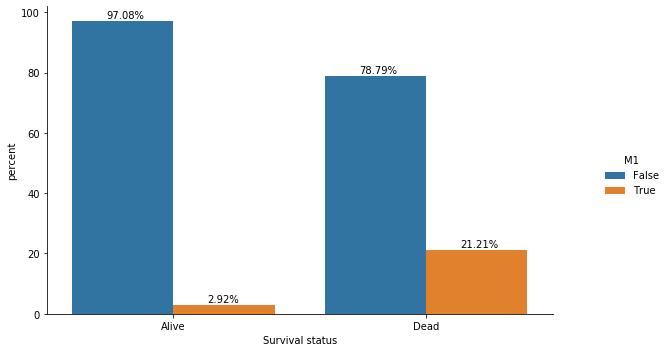

In [72]:
x, y = 'DEAD', 'M1'

ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar'))

ax.set(xticklabels=['Alive','Dead'])
ax.set(xlabel='Survival status')
plt.gcf().set_size_inches(10,5)
    
for p in ax.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    ax.ax.text(txt_x,txt_y,txt)

In [73]:
contingency = pd.crosstab(df['DEAD'], df['M1'])
contingency

M1,False,True
DEAD,,
0,101284,3049
1,1066,287


In [74]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.0


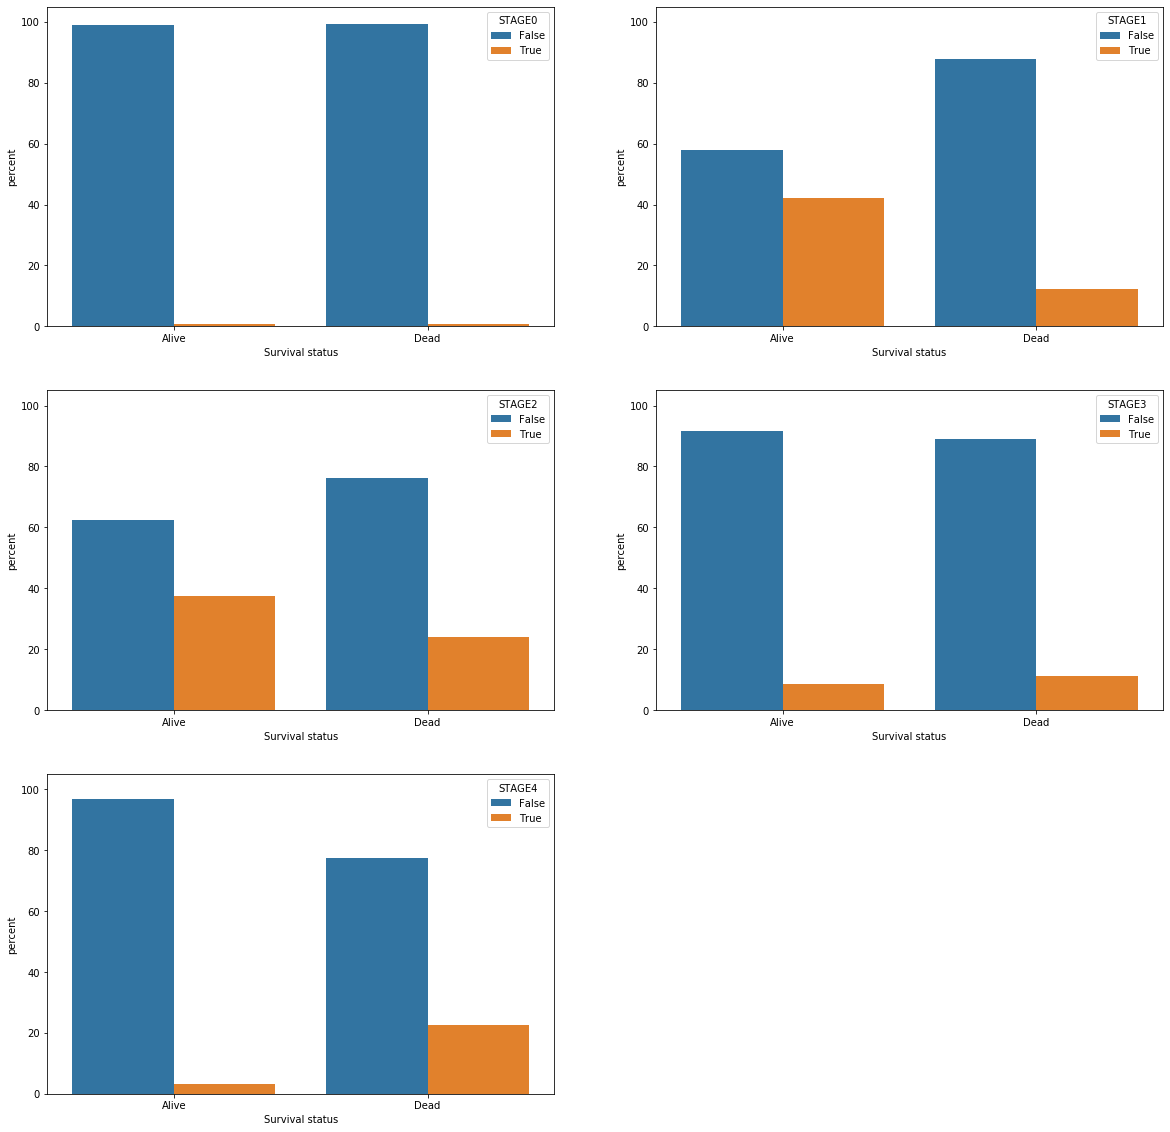

In [75]:
f, axes = plt.subplots(3, 2, figsize=(20, 20))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'STAGE0'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


#Figure 2
x, y = 'DEAD', 'STAGE1'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


#Figure 3
x, y = 'DEAD', 'STAGE2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)
    

#Figure 4
x, y = 'DEAD', 'STAGE3'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


#Figure 5
x, y = 'DEAD', 'STAGE4'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 0]))

axes[2,0].set(xticklabels=['Alive','Dead'])
axes[2,0].set(xlabel='Survival status')
axes[2,0].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)

    
    
# for p in ax.ax.patches:
#     txt = str(p.get_height().round(2)) + '%'
#     txt_x = p.get_x() + p.get_width() / 3
#     txt_y = p.get_height() + 1
#     ax.ax.text(txt_x,txt_y,txt)
    
 
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
f.delaxes(ax = axes[2,1]) 
plt.show()

In [76]:
contingency = pd.crosstab(df['DEAD'], df['STAGE0'])
contingency

STAGE0,False,True
DEAD,,
0,103386,947
1,1343,10


In [77]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.6128912707658334


In [78]:
contingency = pd.crosstab(df['DEAD'], df['STAGE1'])
contingency

STAGE1,False,True
DEAD,,
0,60334,43999
1,1187,166


In [79]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

1.6217755153294007e-108


In [80]:
contingency = pd.crosstab(df['DEAD'], df['STAGE2'])
contingency

STAGE2,False,True
DEAD,,
0,65099,39234
1,1029,324


In [81]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

8.146907380664284e-25


In [82]:
contingency = pd.crosstab(df['DEAD'], df['STAGE3'])
contingency

STAGE3,False,True
DEAD,,
0,95547,8786
1,1203,150


In [83]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.000556219096115474


In [84]:
contingency = pd.crosstab(df['DEAD'], df['STAGE4'])
contingency

STAGE4,False,True
DEAD,,
0,101082,3251
1,1049,304


In [85]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.0


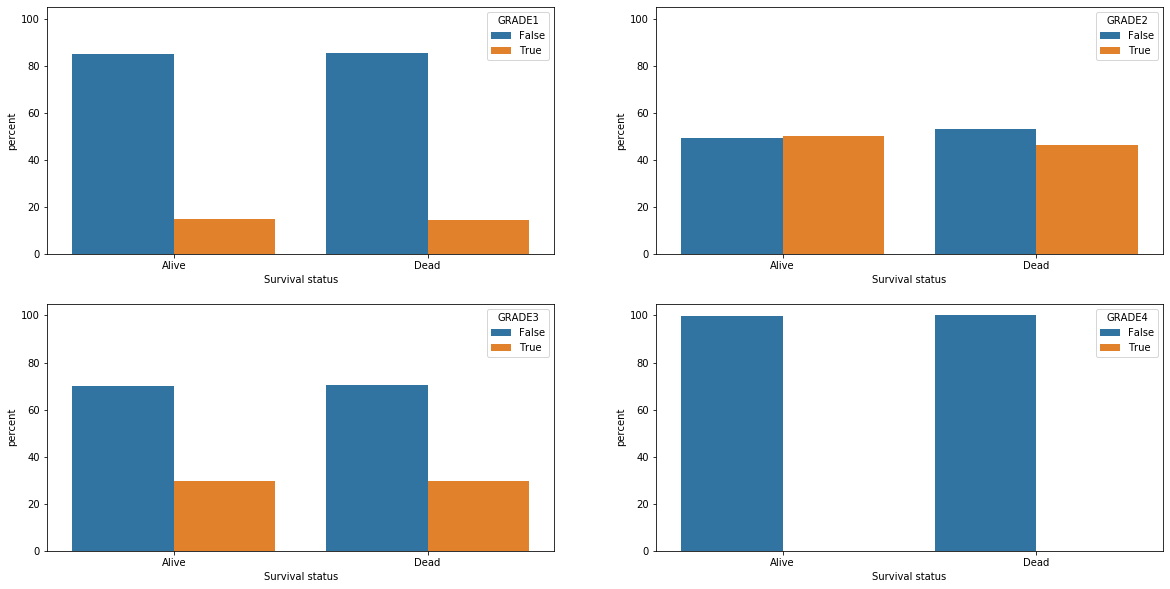

In [86]:
f, axes = plt.subplots(2, 2, figsize=(20, 10))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'GRADE1'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


#Figure 2
x, y = 'DEAD', 'GRADE2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


#Figure 3
x, y = 'DEAD', 'GRADE3'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)
    

#Figure 4
x, y = 'DEAD', 'GRADE4'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


    
    
# for p in ax.ax.patches:
#     txt = str(p.get_height().round(2)) + '%'
#     txt_x = p.get_x() + p.get_width() / 3
#     txt_y = p.get_height() + 1
#     ax.ax.text(txt_x,txt_y,txt)
    
 
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.show()

In [87]:
contingency = pd.crosstab(df['DEAD'], df['GRADE1'])
contingency

GRADE1,False,True
DEAD,,
0,88826,15507
1,1155,198


In [88]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.8440885561209748


In [89]:
contingency = pd.crosstab(df['DEAD'], df['GRADE2'])
contingency

GRADE2,False,True
DEAD,,
0,51759,52574
1,723,630


In [90]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.005600716110794706


In [91]:
contingency = pd.crosstab(df['DEAD'], df['GRADE3'])
contingency

GRADE3,False,True
DEAD,,
0,73218,31115
1,951,402


In [92]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.95311733549562


In [93]:
contingency = pd.crosstab(df['DEAD'], df['GRADE4'])
contingency

GRADE4,False,True
DEAD,,
0,104273,60
1,1353,0


In [94]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.7580871371427672


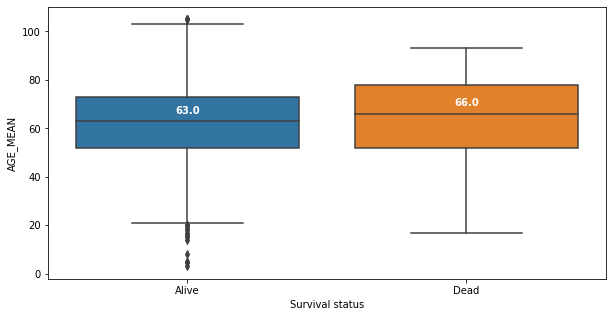

In [95]:
ax = sns.boxplot(data = df, x = 'DEAD', y = 'AGE_MEAN')

medians = df.groupby(['DEAD'])['AGE_MEAN'].median()
vertical_offset = df['AGE_MEAN'].median() * 0.05

for xtick in ax.get_xticks():
    ax.text(xtick, medians[xtick] + vertical_offset, medians[xtick], 
            horizontalalignment = 'center', color = 'white', weight = 'semibold')

ax.set(xticklabels=['Alive','Dead'])
ax.set(xlabel='Survival status')
plt.gcf().set_size_inches(10,5)

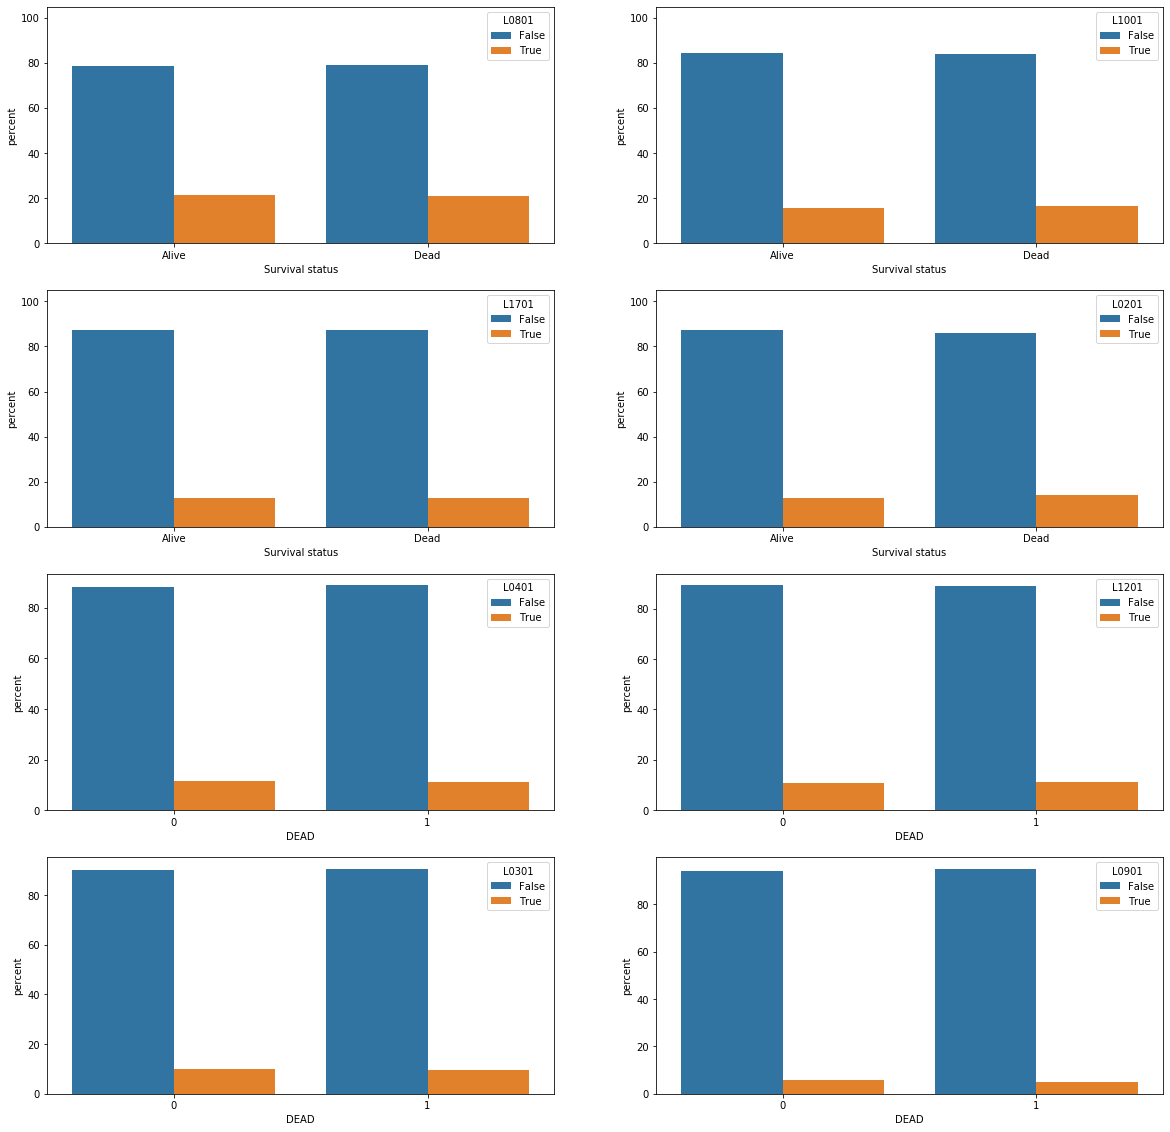

In [96]:
f, axes = plt.subplots(4, 2, figsize=(20, 20))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'L0801'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


#Figure 2
x, y = 'DEAD', 'L1001'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


#Figure 3
x, y = 'DEAD', 'L1701'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)
    

#Figure 4
x, y = 'DEAD', 'L0201'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)

#Figure 5
x, y = 'DEAD', 'L0401'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 0]))

axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


#Figure 6
x, y = 'DEAD', 'L1201'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 1]))

axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


#Figure 7
x, y = 'DEAD', 'L0301'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[3, 0]))

axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)
    

#Figure 8
x, y = 'DEAD', 'L0901'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[3, 1]))

axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)
    
    
# for p in ax.ax.patches:
#     txt = str(p.get_height().round(2)) + '%'
#     txt_x = p.get_x() + p.get_width() / 3
#     txt_y = p.get_height() + 1
#     ax.ax.text(txt_x,txt_y,txt)
    
 
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
plt.close(7)
plt.close(8)
plt.close(9)
plt.show()

In [97]:
contingency = pd.crosstab(df['DEAD'], df['L0801'])
contingency

L0801,False,True
DEAD,,
0,82083,22250
1,1069,284


In [98]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.7902280267867728


In [99]:
contingency = pd.crosstab(df['DEAD'], df['L1001'])
contingency

L1001,False,True
DEAD,,
0,87987,16346
1,1133,220


In [100]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.5765030254883561


In [101]:
contingency = pd.crosstab(df['DEAD'], df['L1701'])
contingency

L1701,False,True
DEAD,,
0,91130,13203
1,1184,169


In [102]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.8894159209546657


In [103]:
contingency = pd.crosstab(df['DEAD'], df['L0201'])
contingency

L0201,False,True
DEAD,,
0,91229,13104
1,1166,187


In [104]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.17733065446062915


In [105]:
contingency = pd.crosstab(df['DEAD'], df['L0401'])
contingency

L0401,False,True
DEAD,,
0,92207,12126
1,1204,149


In [106]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.5138075762896162


In [107]:
contingency = pd.crosstab(df['DEAD'], df['L1201'])
contingency

L1201,False,True
DEAD,,
0,93263,11070
1,1203,150


In [108]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.6026623819372182


In [109]:
contingency = pd.crosstab(df['DEAD'], df['L0301'])
contingency

L0301,False,True
DEAD,,
0,94110,10223
1,1226,127


In [110]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.6452064122222376


In [111]:
contingency = pd.crosstab(df['DEAD'], df['L0901'])
contingency

L0901,False,True
DEAD,,
0,98301,6032
1,1286,67


In [112]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.2144542587960314


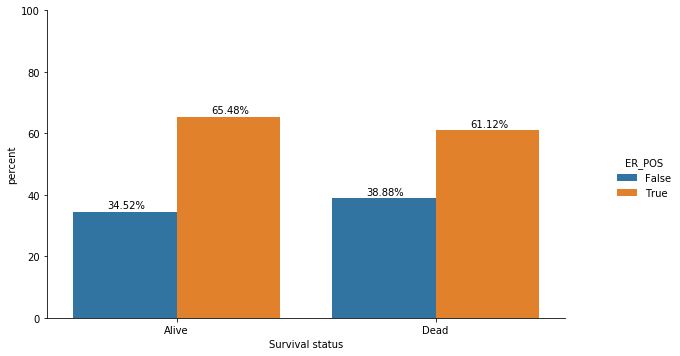

In [113]:
x, y = 'DEAD', 'ER_POS'

ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar'))

ax.set(xticklabels=['Alive','Dead'])
ax.set(xlabel='Survival status')
ax.ax.set_ylim(0, 100)
plt.gcf().set_size_inches(10,5)
    
for p in ax.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    ax.ax.text(txt_x,txt_y,txt)

In [114]:
contingency = pd.crosstab(df['DEAD'], df['ER_POS'])
contingency

ER_POS,False,True
DEAD,,
0,36011,68322
1,526,827


In [115]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.0008921782546570287


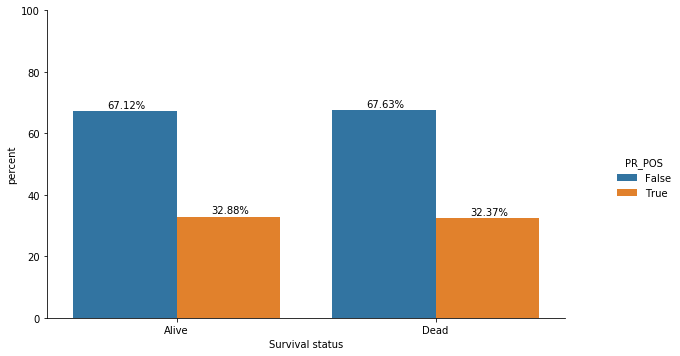

In [116]:
x, y = 'DEAD', 'PR_POS'

ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar'))

ax.set(xticklabels=['Alive','Dead'])
ax.set(xlabel='Survival status')
ax.ax.set_ylim(0, 100)
plt.gcf().set_size_inches(10,5)
    
for p in ax.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    ax.ax.text(txt_x,txt_y,txt)

In [117]:
contingency = pd.crosstab(df['DEAD'], df['PR_POS'])
contingency

PR_POS,False,True
DEAD,,
0,70025,34308
1,915,438


In [118]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.7127486251989907


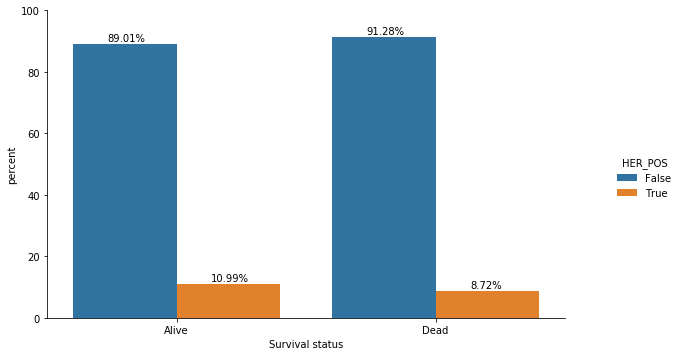

In [119]:
x, y = 'DEAD', 'HER_POS'

ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar'))

ax.set(xticklabels=['Alive','Dead'])
ax.set(xlabel='Survival status')
ax.ax.set_ylim(0, 100)
plt.gcf().set_size_inches(10,5)
    
for p in ax.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    ax.ax.text(txt_x,txt_y,txt)

In [120]:
contingency = pd.crosstab(df['DEAD'], df['HER_POS'])
contingency

HER_POS,False,True
DEAD,,
0,92870,11463
1,1235,118


In [121]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.009135389408736634


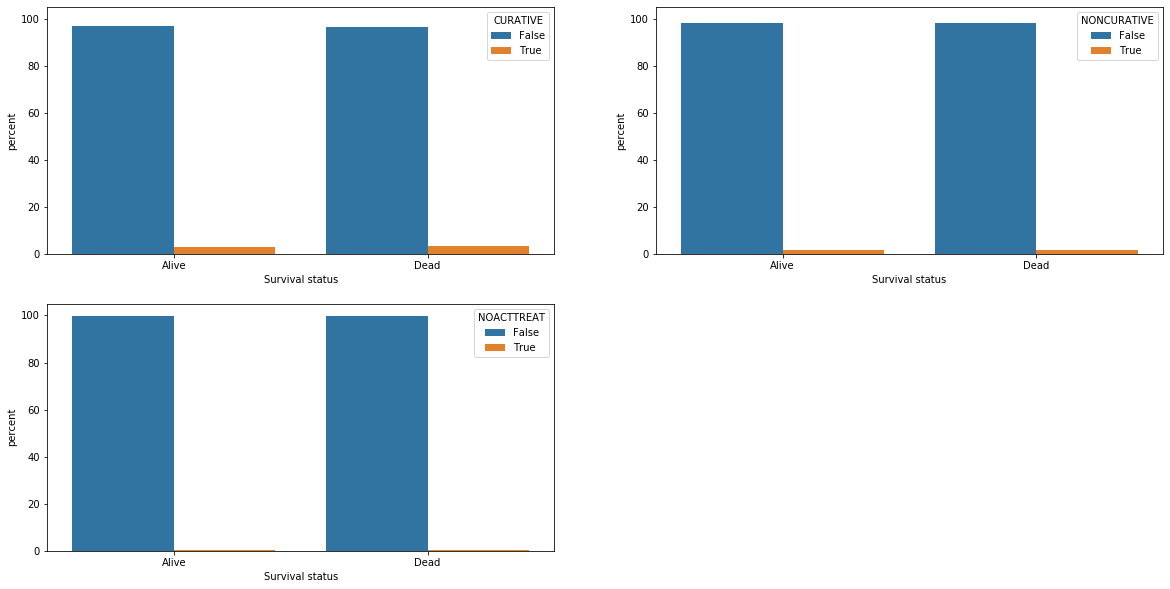

In [122]:
f, axes = plt.subplots(2, 2, figsize=(20, 10))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'CURATIVE'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


#Figure 2
x, y = 'DEAD', 'NONCURATIVE'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


#Figure 3
x, y = 'DEAD', 'NOACTTREAT'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)
    
plt.close(2)
plt.close(3)
plt.close(4)
f.delaxes(ax = axes[1,1]) 
plt.show()

In [123]:
contingency = pd.crosstab(df['DEAD'], df['CURATIVE'])
contingency

CURATIVE,False,True
DEAD,,
0,101289,3044
1,1308,45


In [124]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.42094294785127073


In [125]:
contingency = pd.crosstab(df['DEAD'], df['NONCURATIVE'])
contingency

NONCURATIVE,False,True
DEAD,,
0,102560,1773
1,1327,26


In [126]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.601475351314616


In [127]:
contingency = pd.crosstab(df['DEAD'], df['NOACTTREAT'])
contingency

NOACTTREAT,False,True
DEAD,,
0,104128,205
1,1351,2


In [128]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.9260239955252281


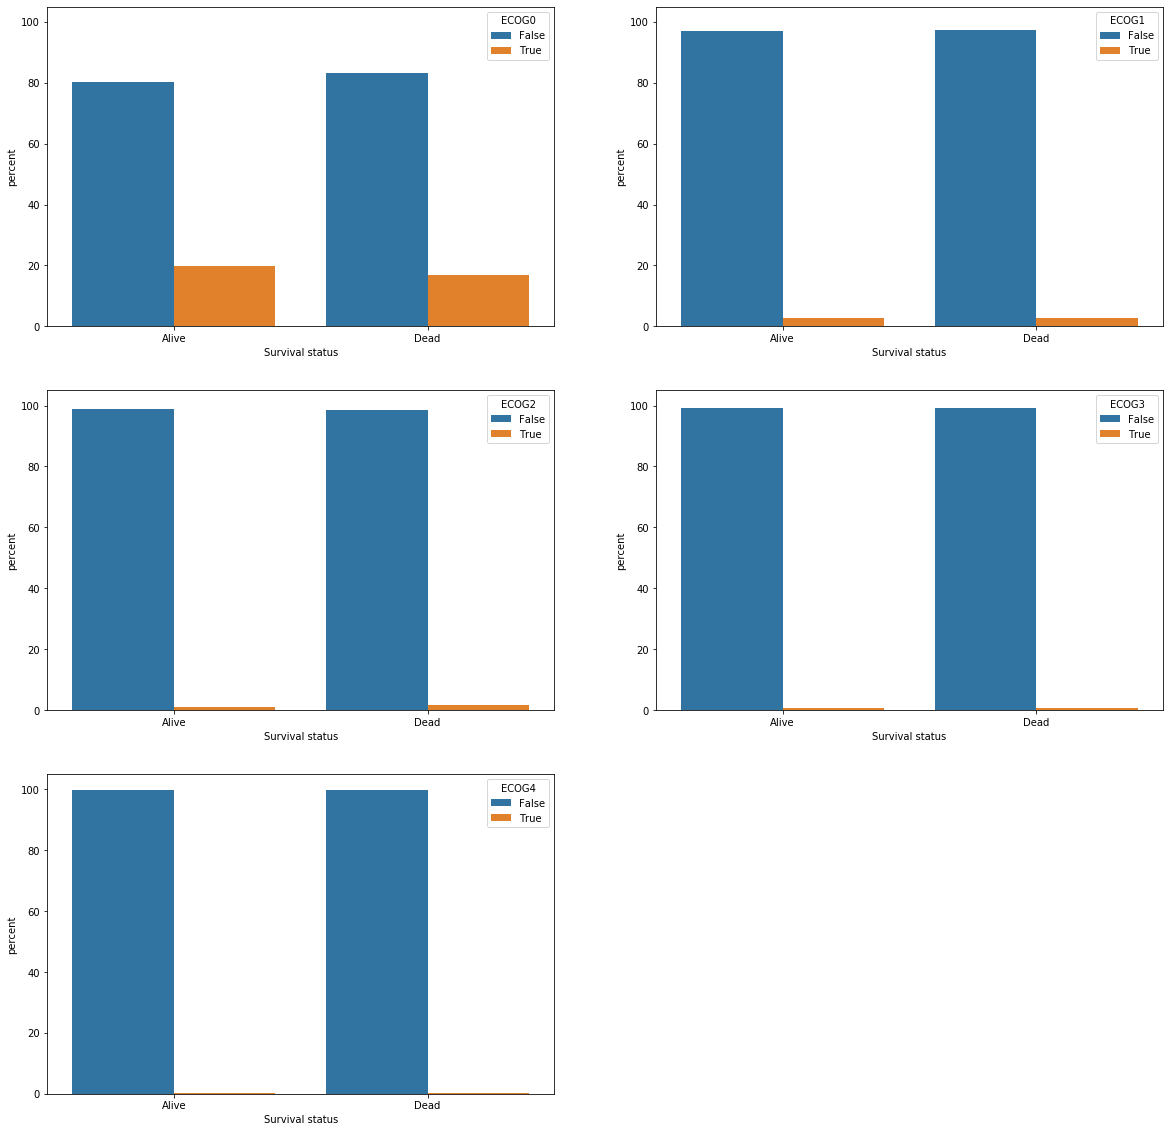

In [129]:
f, axes = plt.subplots(3, 2, figsize=(20, 20))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'ECOG0'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


#Figure 2
x, y = 'DEAD', 'ECOG1'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


#Figure 3
x, y = 'DEAD', 'ECOG2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)
    

#Figure 4
x, y = 'DEAD', 'ECOG3'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


#Figure 5
x, y = 'DEAD', 'ECOG4'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 0]))

axes[2,0].set(xticklabels=['Alive','Dead'])
axes[2,0].set(xlabel='Survival status')
axes[2,0].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)

    
    
# for p in ax.ax.patches:
#     txt = str(p.get_height().round(2)) + '%'
#     txt_x = p.get_x() + p.get_width() / 3
#     txt_y = p.get_height() + 1
#     ax.ax.text(txt_x,txt_y,txt)
    
 
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
f.delaxes(ax = axes[2,1]) 
plt.show()

In [130]:
contingency = pd.crosstab(df['DEAD'], df['ECOG0'])
contingency

ECOG0,False,True
DEAD,,
0,83783,20550
1,1124,229


In [131]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.011940953302875543


In [132]:
contingency = pd.crosstab(df['DEAD'], df['ECOG1'])
contingency

ECOG1,False,True
DEAD,,
0,101339,2994
1,1315,38


In [133]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.9587053425618697


In [134]:
contingency = pd.crosstab(df['DEAD'], df['ECOG2'])
contingency

ECOG2,False,True
DEAD,,
0,103217,1116
1,1332,21


In [135]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.1148987906193704


In [136]:
contingency = pd.crosstab(df['DEAD'], df['ECOG3'])
contingency

ECOG3,False,True
DEAD,,
0,103496,837
1,1344,9


In [137]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.6828662954148319


In [138]:
contingency = pd.crosstab(df['DEAD'], df['ECOG4'])
contingency

ECOG4,False,True
DEAD,,
0,104060,273
1,1349,4


In [139]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.9802854921619124


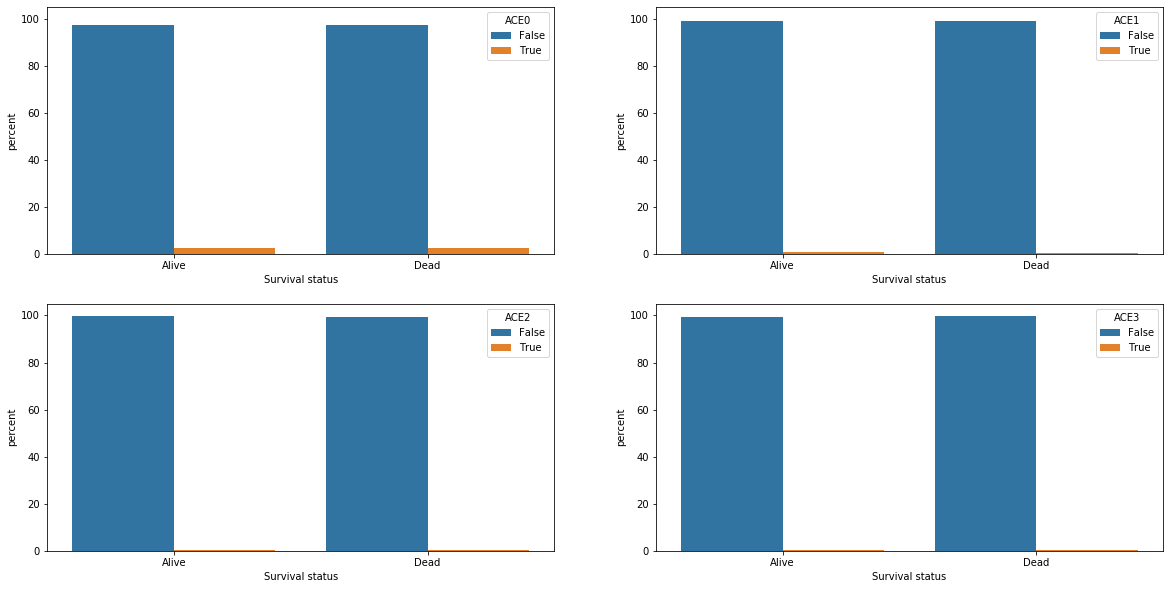

In [140]:
f, axes = plt.subplots(2, 2, figsize=(20, 10))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'ACE0'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


#Figure 2
x, y = 'DEAD', 'ACE1'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


#Figure 3
x, y = 'DEAD', 'ACE2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)
    

#Figure 4
x, y = 'DEAD', 'ACE3'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)

 
    
# for p in ax.ax.patches:
#     txt = str(p.get_height().round(2)) + '%'
#     txt_x = p.get_x() + p.get_width() / 3
#     txt_y = p.get_height() + 1
#     ax.ax.text(txt_x,txt_y,txt)
    
 
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.show()

In [141]:
contingency = pd.crosstab(df['DEAD'], df['ACE0'])
contingency

ACE0,False,True
DEAD,,
0,101528,2805
1,1319,34


In [142]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.7548490941239119


In [143]:
contingency = pd.crosstab(df['DEAD'], df['ACE1'])
contingency

ACE1,False,True
DEAD,,
0,103483,850
1,1343,10


In [144]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.8766137908719438


In [145]:
contingency = pd.crosstab(df['DEAD'], df['ACE2'])
contingency

ACE2,False,True
DEAD,,
0,103941,392
1,1347,6


In [146]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.8565081536861747


In [147]:
contingency = pd.crosstab(df['DEAD'], df['ACE3'])
contingency

ACE3,False,True
DEAD,,
0,103875,458
1,1348,5


In [148]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.8594630799028298


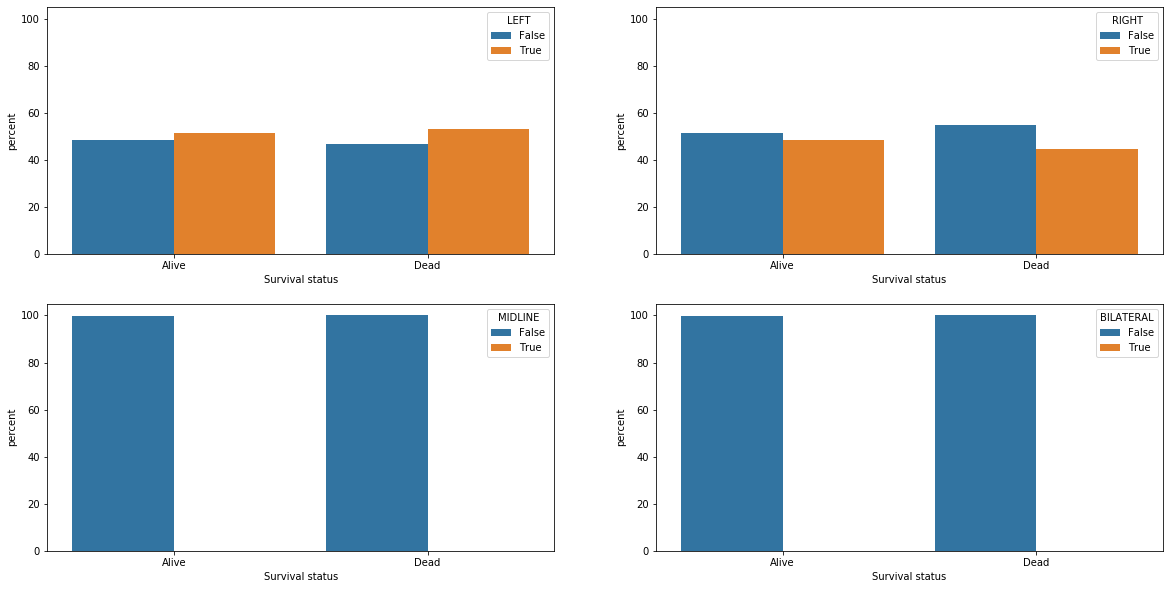

In [149]:
f, axes = plt.subplots(2, 2, figsize=(20, 10))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'LEFT'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


#Figure 2
x, y = 'DEAD', 'RIGHT'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


#Figure 3
x, y = 'DEAD', 'MIDLINE'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)
    

#Figure 4
x, y = 'DEAD', 'BILATERAL'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)

 
    
# for p in ax.ax.patches:
#     txt = str(p.get_height().round(2)) + '%'
#     txt_x = p.get_x() + p.get_width() / 3
#     txt_y = p.get_height() + 1
#     ax.ax.text(txt_x,txt_y,txt)
    
 
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.show()

In [150]:
contingency = pd.crosstab(df['DEAD'], df['LEFT'])
contingency

LEFT,False,True
DEAD,,
0,50756,53577
1,635,718


In [151]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.2198574288484486


In [152]:
contingency = pd.crosstab(df['DEAD'], df['RIGHT'])
contingency

RIGHT,False,True
DEAD,,
0,53870,50463
1,745,608


In [153]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.013093905536951203


In [154]:
contingency = pd.crosstab(df['DEAD'], df['MIDLINE'])
contingency

MIDLINE,False,True
DEAD,,
0,104312,21
1,1353,0


In [155]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.6536174055644179


In [156]:
contingency = pd.crosstab(df['DEAD'], df['BILATERAL'])
contingency

BILATERAL,False,True
DEAD,,
0,104319,14
1,1353,0


In [157]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.4456802885829185


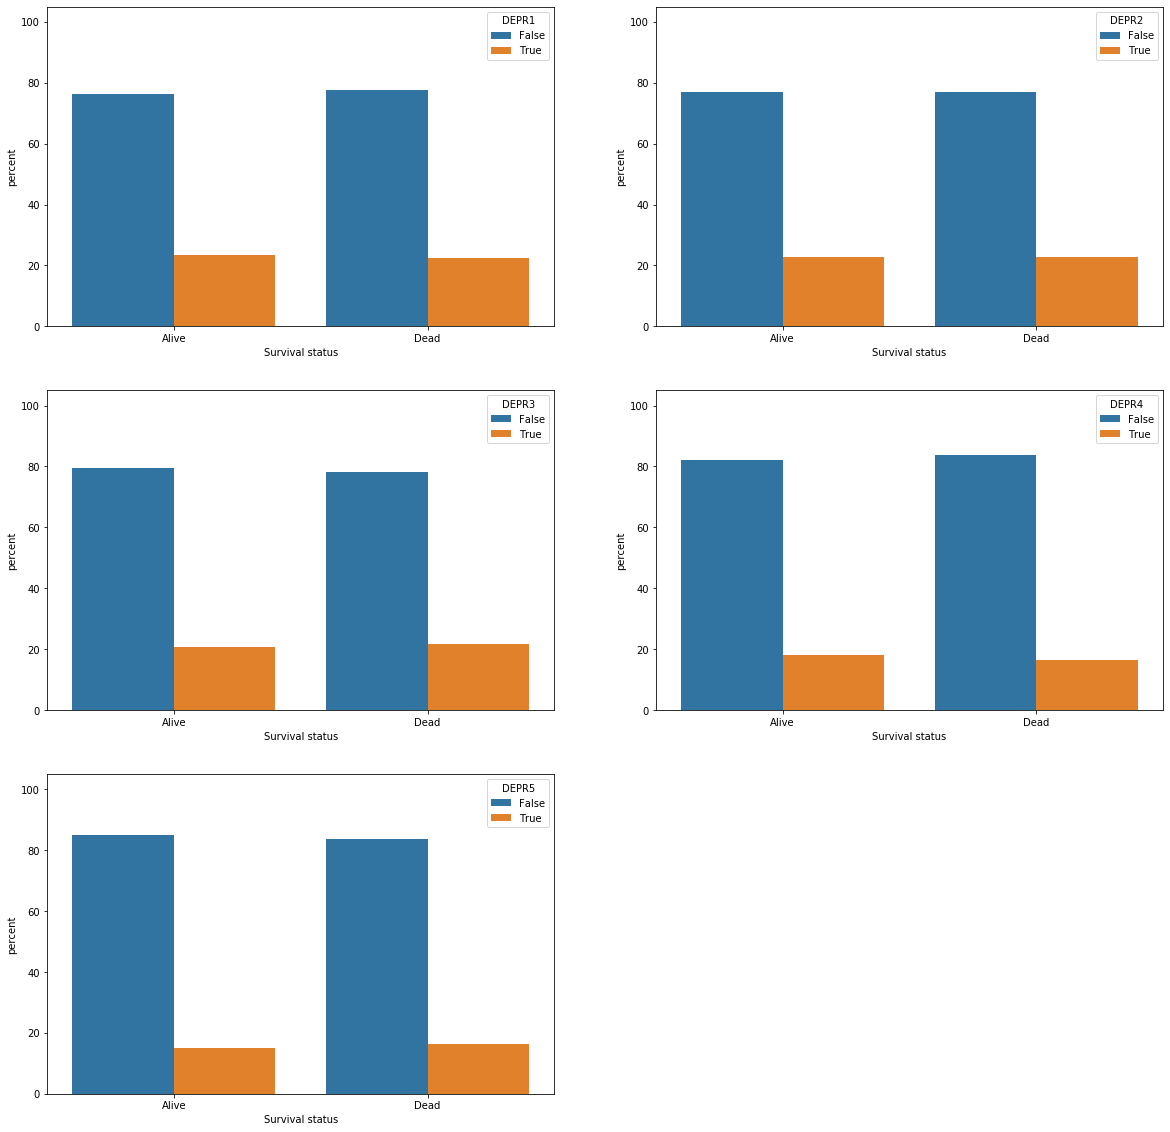

In [158]:
f, axes = plt.subplots(3, 2, figsize=(20, 20))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'DEPR1'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


#Figure 2
x, y = 'DEAD', 'DEPR2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


#Figure 3
x, y = 'DEAD', 'DEPR3'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)
    

#Figure 4
x, y = 'DEAD', 'DEPR4'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


#Figure 5
x, y = 'DEAD', 'DEPR5'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 0]))

axes[2,0].set(xticklabels=['Alive','Dead'])
axes[2,0].set(xlabel='Survival status')
axes[2,0].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)

    
    
# for p in ax.ax.patches:
#     txt = str(p.get_height().round(2)) + '%'
#     txt_x = p.get_x() + p.get_width() / 3
#     txt_y = p.get_height() + 1
#     ax.ax.text(txt_x,txt_y,txt)
    
 
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
f.delaxes(ax = axes[2,1]) 
plt.show()

In [159]:
contingency = pd.crosstab(df['DEAD'], df['DEPR1'])
contingency

DEPR1,False,True
DEAD,,
0,79768,24565
1,1048,305


In [160]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.40581115687761693


In [161]:
contingency = pd.crosstab(df['DEAD'], df['DEPR2'])
contingency

DEPR2,False,True
DEAD,,
0,80401,23932
1,1043,310


In [162]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.9921009803820462


In [163]:
contingency = pd.crosstab(df['DEAD'], df['DEPR3'])
contingency

DEPR3,False,True
DEAD,,
0,82863,21470
1,1058,295


In [164]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.28312313455083754


In [165]:
contingency = pd.crosstab(df['DEAD'], df['DEPR4'])
contingency

DEPR4,False,True
DEAD,,
0,85560,18773
1,1132,221


In [166]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.12264699209897274


In [167]:
contingency = pd.crosstab(df['DEAD'], df['DEPR5'])
contingency

DEPR5,False,True
DEAD,,
0,88682,15651
1,1131,222


In [168]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.16120780506348836


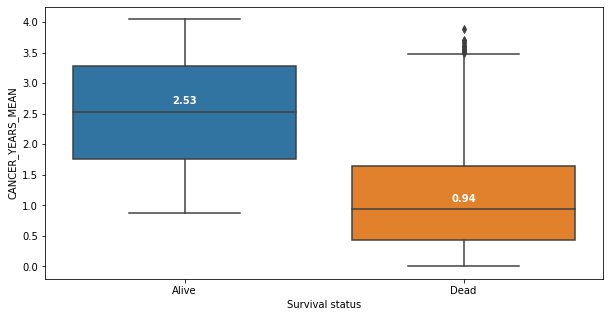

In [169]:
ax = sns.boxplot(data = df, x = 'DEAD', y = 'CANCER_YEARS_MEAN')

medians = df.groupby(['DEAD'])['CANCER_YEARS_MEAN'].median().round(2)
vertical_offset = df['CANCER_YEARS_MEAN'].median() * 0.05

for xtick in ax.get_xticks():
    ax.text(xtick, medians[xtick] + vertical_offset, medians[xtick], 
            horizontalalignment = 'center', color = 'white', weight = 'semibold')

ax.set(xticklabels=['Alive','Dead'])
ax.set(xlabel='Survival status')
plt.gcf().set_size_inches(10,5)

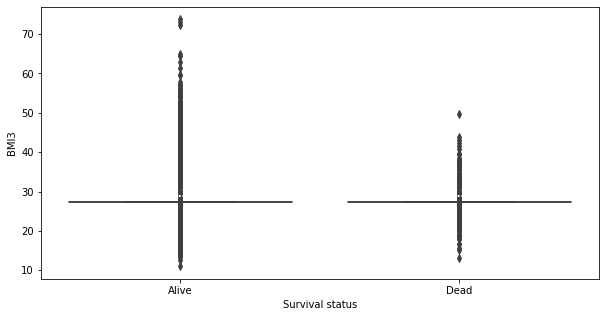

In [170]:
ax = sns.boxplot(data = df, x = 'DEAD', y = 'BMI3')

medians = df.groupby(['DEAD'])['BMI3'].median().round(2)
vertical_offset = df['BMI3'].median() * 0.05

for xtick in ax.get_xticks():
    ax.text(xtick, medians[xtick] + vertical_offset, medians[xtick], 
            horizontalalignment = 'center', color = 'white', weight = 'semibold')

ax.set(xticklabels=['Alive','Dead'])
ax.set(xlabel='Survival status')
plt.gcf().set_size_inches(10,5)

In [171]:
df['BMI3'].describe()

count    105686.000000
mean         27.466424
std           2.509883
min          10.976562
25%          27.325078
50%          27.325078
75%          27.325078
max          73.696145
Name: BMI3, dtype: float64

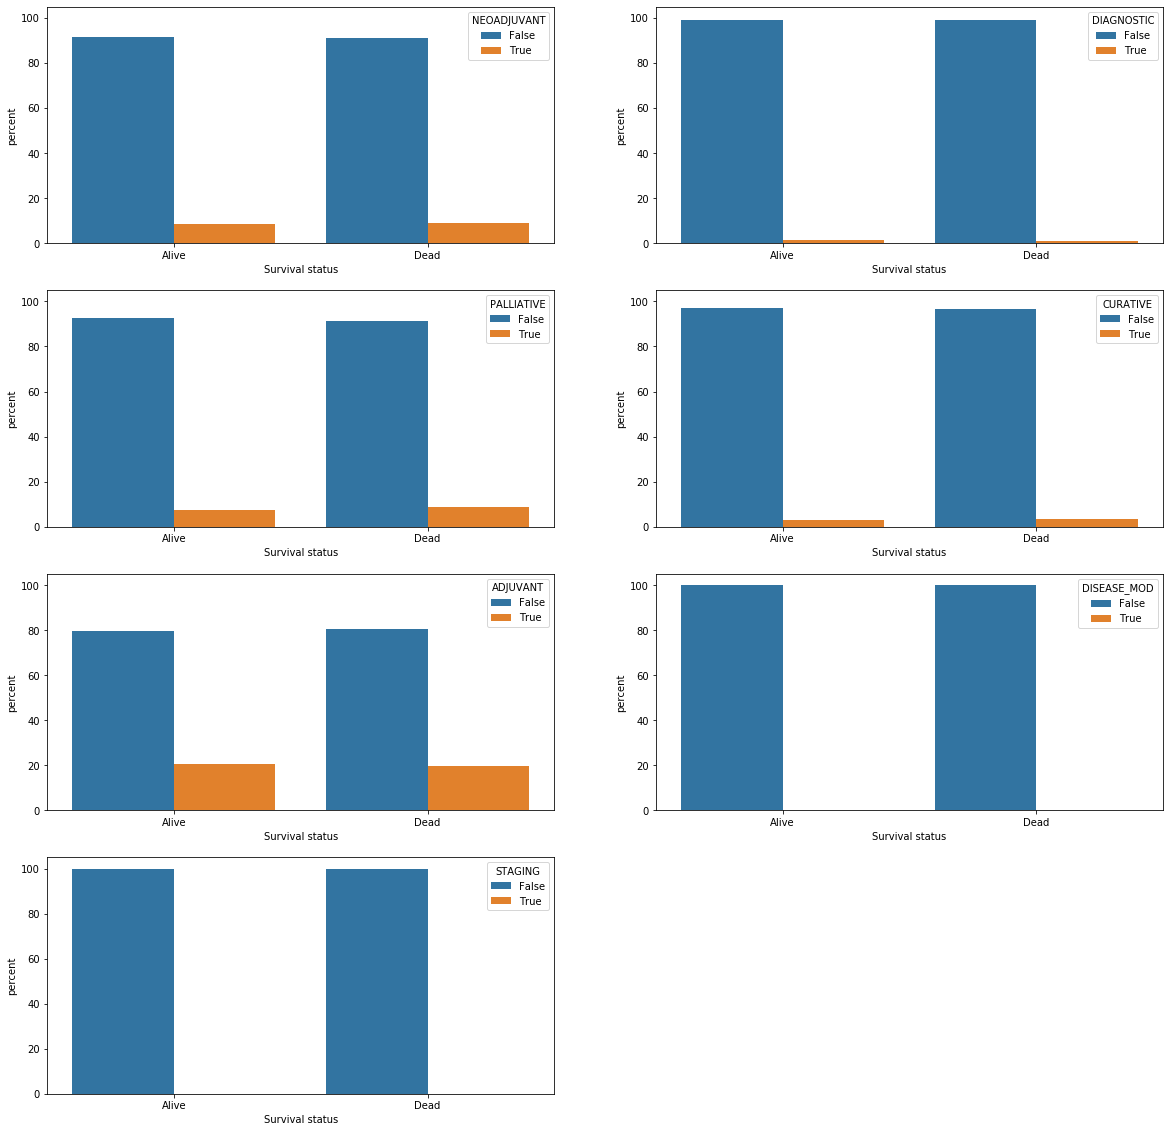

In [172]:
f, axes = plt.subplots(4, 2, figsize=(20, 20))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'NEOADJUVANT'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


#Figure 2
x, y = 'DEAD', 'DIAGNOSTIC'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


#Figure 3
x, y = 'DEAD', 'PALLIATIVE'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)
    

#Figure 4
x, y = 'DEAD', 'CURATIVE'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


#Figure 5
x, y = 'DEAD', 'ADJUVANT'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 0]))

axes[2,0].set(xticklabels=['Alive','Dead'])
axes[2,0].set(xlabel='Survival status')
axes[2,0].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


#Figure 6
x, y = 'DEAD', 'DISEASE_MOD'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 1]))

axes[2,1].set(xticklabels=['Alive','Dead'])
axes[2,1].set(xlabel='Survival status')
axes[2,1].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


#Figure 7
x, y = 'DEAD', 'STAGING'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[3, 0]))

axes[3,0].set(xticklabels=['Alive','Dead'])
axes[3,0].set(xlabel='Survival status')
axes[3,0].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)    
    
# for p in ax.ax.patches:
#     txt = str(p.get_height().round(2)) + '%'
#     txt_x = p.get_x() + p.get_width() / 3
#     txt_y = p.get_height() + 1
#     ax.ax.text(txt_x,txt_y,txt)
    
 
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
plt.close(7)
plt.close(8)
f.delaxes(ax = axes[3,1]) 
plt.show()

In [173]:
contingency = pd.crosstab(df['DEAD'], df['NEOADJUVANT'])
contingency

NEOADJUVANT,False,True
DEAD,,
0,95595,8738
1,1233,120


In [174]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.5470112637702813


In [175]:
contingency = pd.crosstab(df['DEAD'], df['DIAGNOSTIC'])
contingency

DIAGNOSTIC,False,True
DEAD,,
0,103182,1151
1,1342,11


In [176]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.37569955566229396


In [177]:
contingency = pd.crosstab(df['DEAD'], df['PALLIATIVE'])
contingency

PALLIATIVE,False,True
DEAD,,
0,96688,7645
1,1236,117


In [178]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.07236717200967298


In [179]:
contingency = pd.crosstab(df['DEAD'], df['CURATIVE'])
contingency

CURATIVE,False,True
DEAD,,
0,101289,3044
1,1308,45


In [180]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.42094294785127073


In [181]:
contingency = pd.crosstab(df['DEAD'], df['ADJUVANT'])
contingency

ADJUVANT,False,True
DEAD,,
0,82941,21392
1,1089,264


In [182]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.3877252359337985


In [183]:
contingency = pd.crosstab(df['DEAD'], df['DISEASE_MOD'])
contingency

DISEASE_MOD,False,True
DEAD,,
0,104260,73
1,1352,1


In [184]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.643544837773711


In [185]:
contingency = pd.crosstab(df['DEAD'], df['STAGING'])
contingency

STAGING,False,True
DEAD,,
0,104329,4
1,1353,0


In [186]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.04592380755468127


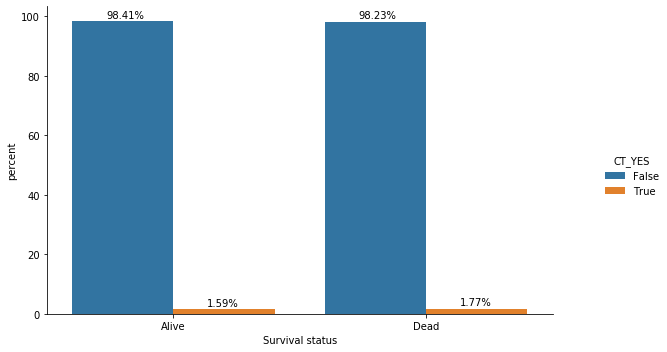

In [187]:
x, y = 'DEAD', 'CT_YES'

ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar'))

ax.set(xticklabels=['Alive','Dead'])
ax.set(xlabel='Survival status')
plt.gcf().set_size_inches(10,5)
    
for p in ax.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    ax.ax.text(txt_x,txt_y,txt)

In [188]:
contingency = pd.crosstab(df['DEAD'], df['CT_YES'])
contingency

CT_YES,False,True
DEAD,,
0,102678,1655
1,1329,24


In [189]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.660787154176512


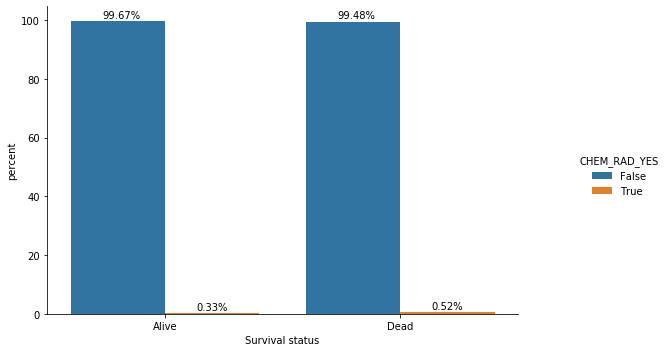

In [190]:
x, y = 'DEAD', 'CHEM_RAD_YES'

ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar'))

ax.set(xticklabels=['Alive','Dead'])
ax.set(xlabel='Survival status')
plt.gcf().set_size_inches(10,5)
    
for p in ax.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    ax.ax.text(txt_x,txt_y,txt)

In [191]:
contingency = pd.crosstab(df['DEAD'], df['CHEM_RAD_YES'])
contingency

CHEM_RAD_YES,False,True
DEAD,,
0,103993,340
1,1346,7


In [192]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.32501534623869704


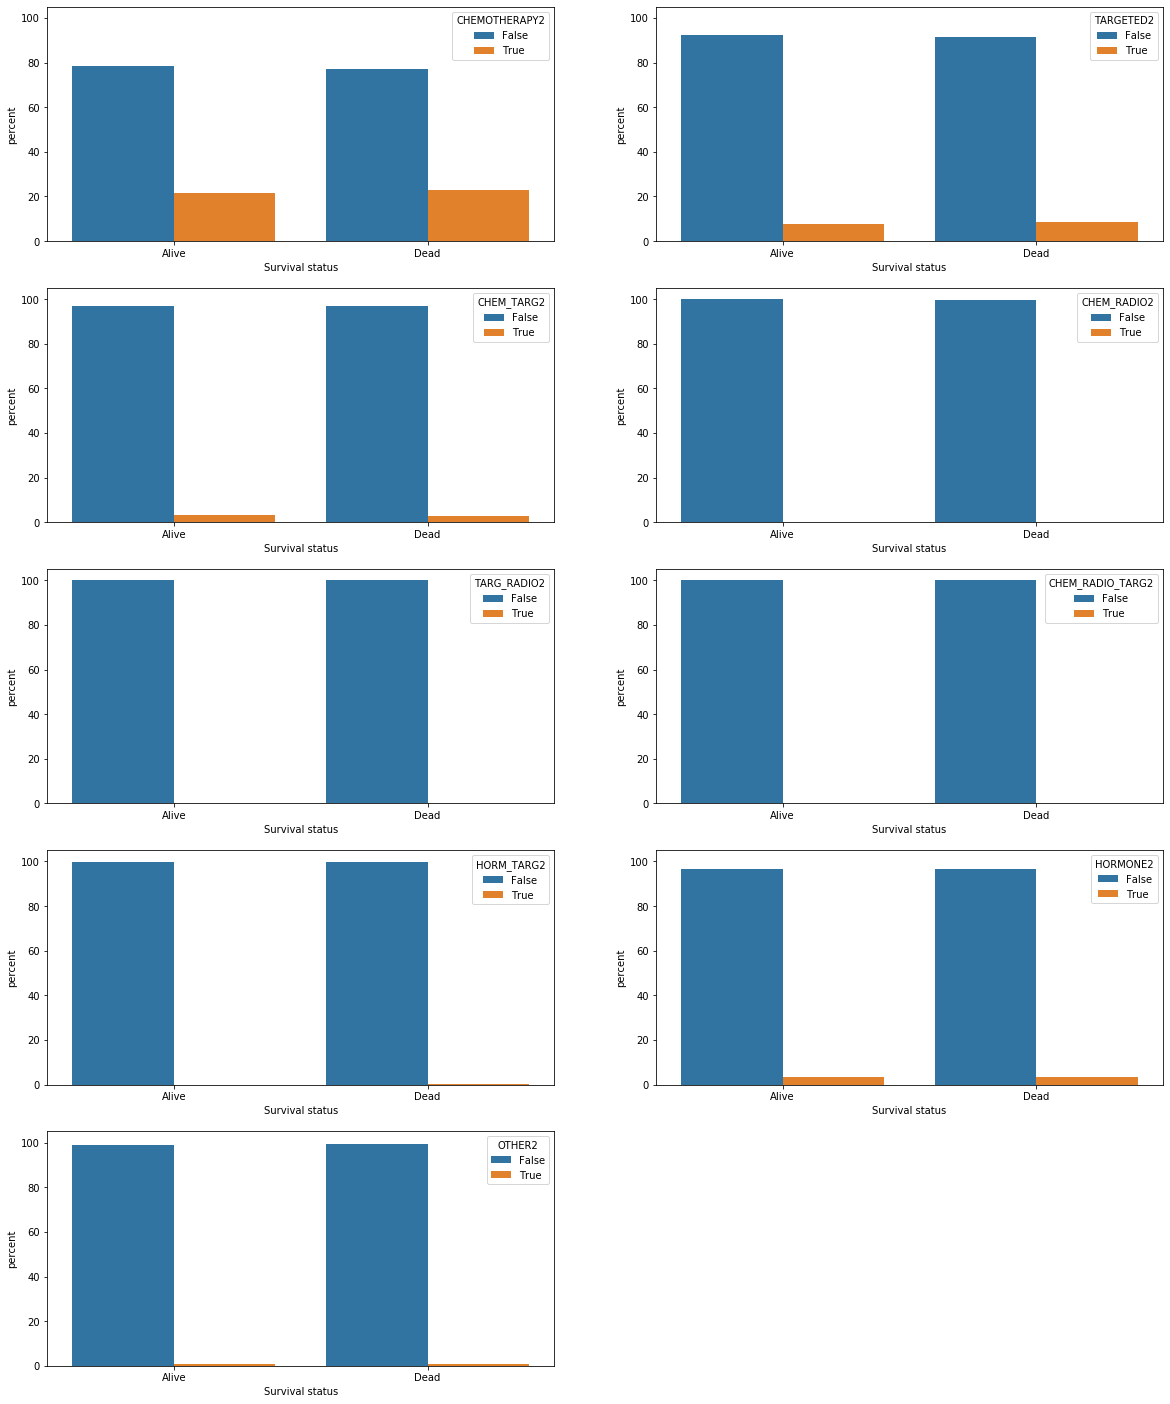

In [193]:
f, axes = plt.subplots(5, 2, figsize=(20, 25))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'CHEMOTHERAPY2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


#Figure 2
x, y = 'DEAD', 'TARGETED2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


#Figure 3
x, y = 'DEAD', 'CHEM_TARG2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)
    

#Figure 4
x, y = 'DEAD', 'CHEM_RADIO2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


#Figure 5
x, y = 'DEAD', 'TARG_RADIO2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 0]))

axes[2,0].set(xticklabels=['Alive','Dead'])
axes[2,0].set(xlabel='Survival status')
axes[2,0].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


#Figure 6
x, y = 'DEAD', 'CHEM_RADIO_TARG2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 1]))

axes[2,1].set(xticklabels=['Alive','Dead'])
axes[2,1].set(xlabel='Survival status')
axes[2,1].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


#Figure 7
x, y = 'DEAD', 'HORM_TARG2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[3, 0]))

axes[3,0].set(xticklabels=['Alive','Dead'])
axes[3,0].set(xlabel='Survival status')
axes[3,0].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)    
    
    
#Figure 8
x, y = 'DEAD', 'HORMONE2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[3, 1]))

axes[3,1].set(xticklabels=['Alive','Dead'])
axes[3,1].set(xlabel='Survival status')
axes[3,1].set_ylim(0,105)
plt.gcf().set_size_inches(10,6)


#Figure 9
x, y = 'DEAD', 'OTHER2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[4, 0]))

axes[4,0].set(xticklabels=['Alive','Dead'])
axes[4,0].set(xlabel='Survival status')
axes[4,0].set_ylim(0,105)
plt.gcf().set_size_inches(10,6) 
    
# for p in ax.ax.patches:
#     txt = str(p.get_height().round(2)) + '%'
#     txt_x = p.get_x() + p.get_width() / 3
#     txt_y = p.get_height() + 1
#     ax.ax.text(txt_x,txt_y,txt)
    
 
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
plt.close(7)
plt.close(8)
plt.close(9)
plt.close(10)
f.delaxes(ax = axes[4,1]) 
plt.show()

In [194]:
contingency = pd.crosstab(df['DEAD'], df['CHEMOTHERAPY2'])
contingency

CHEMOTHERAPY2,False,True
DEAD,,
0,81899,22434
1,1041,312


In [195]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.176437738027323


In [196]:
contingency = pd.crosstab(df['DEAD'], df['TARGETED2'])
contingency

TARGETED2,False,True
DEAD,,
0,96332,8001
1,1239,114


In [197]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.3232851522640093


In [198]:
contingency = pd.crosstab(df['DEAD'], df['CHEM_TARG2'])
contingency

CHEM_TARG2,False,True
DEAD,,
0,101010,3323
1,1313,40


In [199]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.6905978095839945


In [200]:
contingency = pd.crosstab(df['DEAD'], df['CHEM_RADIO2'])
contingency

CHEM_RADIO2,False,True
DEAD,,
0,104229,104
1,1349,4


In [201]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.06978802377400149


In [202]:
contingency = pd.crosstab(df['DEAD'], df['TARG_RADIO2'])
contingency

TARG_RADIO2,False,True
DEAD,,
0,104324,9
1,1353,0


In [203]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.25388817712429385


In [204]:
contingency = pd.crosstab(df['DEAD'], df['CHEM_RADIO_TARG2'])
contingency

CHEM_RADIO_TARG2,False,True
DEAD,,
0,104331,2
1,1353,0


In [205]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.0028457775426487075


In [206]:
contingency = pd.crosstab(df['DEAD'], df['HORM_TARG2'])
contingency

HORM_TARG2,False,True
DEAD,,
0,104280,53
1,1352,1


In [207]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.81681744239505


In [208]:
contingency = pd.crosstab(df['DEAD'], df['HORMONE2'])
contingency

HORMONE2,False,True
DEAD,,
0,100742,3591
1,1309,44


In [209]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.7598922155729951


In [210]:
contingency = pd.crosstab(df['DEAD'], df['OTHER2'])
contingency

OTHER2,False,True
DEAD,,
0,103411,922
1,1342,11


In [211]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.896587818439886


In [212]:
df.head()

,PATIENTID,SEX,ETHNICITY,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,PR_POS,HER_POS,CURATIVE,NONCURATIVE,NOACTTREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_DAYS_MEAN,CANCER_MONTHS_MEAN,CANCER_YEARS_MEAN,BMI3,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE.1,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,CHEM_RADIO_TARG2,HORM_TARG2,HORMONE2,OTHER2,DEAD
0,10000724,M,White British,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,71.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,1226.0,40.280088,3.356674,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
1,10000752,F,White British,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,432.0,14.193310,1.182776,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
2,10001050,F,White British,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,450.0,14.784698,1.232058,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
3,10001750,M,White British,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,71.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,846.0,27.795232,2.316269,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
4,10001824,F,Other ethnic group,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,674.0,22.144192,1.845349,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
